This project contains both decision tree and random forest algorithms. I also used Iris Dataset on my previous projects. I'm going to use cross entropy loss function to see the error ratio of my model. I chose this loss function because it's more sensitive to misclassifcaitons. 

 As we know random forest model is more accurate , decision tree model is faster but the dataset is not large so there will be not major differences between the results.

In [77]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
# install tree visualiztion library
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
# get the data 

from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [80]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [81]:
# let's add the target column
iris_df['iris species'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


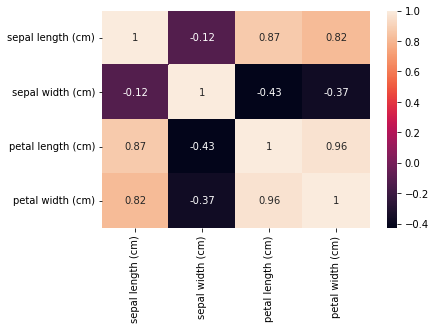

In [82]:
# visualize the data little bit
sns.heatmap(iris_df.drop('iris species', axis=1).corr(), annot=True)

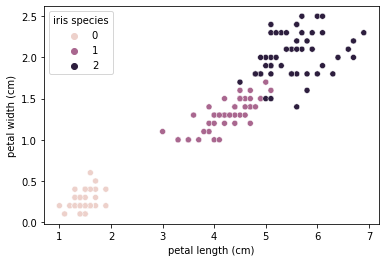

In [83]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=iris_df, hue='iris species') # these 2 features correlation seem very effective on classifying the species 

In [84]:
# split the data

X = iris_df.drop('iris species', axis=1)
y = iris_df['iris species']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
# scale the features
from sklearn.preprocessing import StandardScaler

sclr = StandardScaler()

X_train = sclr.fit_transform(X_train)
X_test = sclr.fit_transform(X_test)

In [86]:
# generate the decision tree model

from sklearn.tree import DecisionTreeClassifier

dtm = DecisionTreeClassifier(criterion='entropy')
dtm.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [87]:
# make predictions and then compare with the actual values
preds = dtm.predict(X_test)
preds

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [88]:
comp_df = pd.DataFrame(preds, columns=['Predictions'])
comp_df['Actual Values'] = y_test
comp_df # it is not so useful to understand so let's visualize it

,Predictions,Actual Values
0,1,NaN
1,0,NaN
2,2,NaN
3,1,NaN
4,1,0.0
5,0,NaN
6,1,NaN
7,2,NaN
8,2,NaN
9,1,0.0


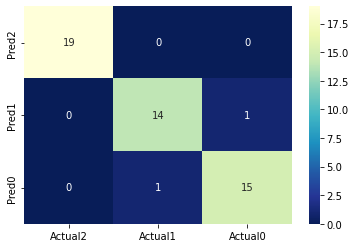

In [89]:
# visualize the predicted values and the actual values with the confusion matrix

from sklearn import metrics

con = metrics.confusion_matrix(y_test, preds)
con_df = pd.DataFrame(con, columns=['Actual2', 'Actual1', 'Actual0'], index=['Pred2', 'Pred1', 'Pred0'])
sns.heatmap(con_df, annot=True, cmap='YlGnBu_r')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


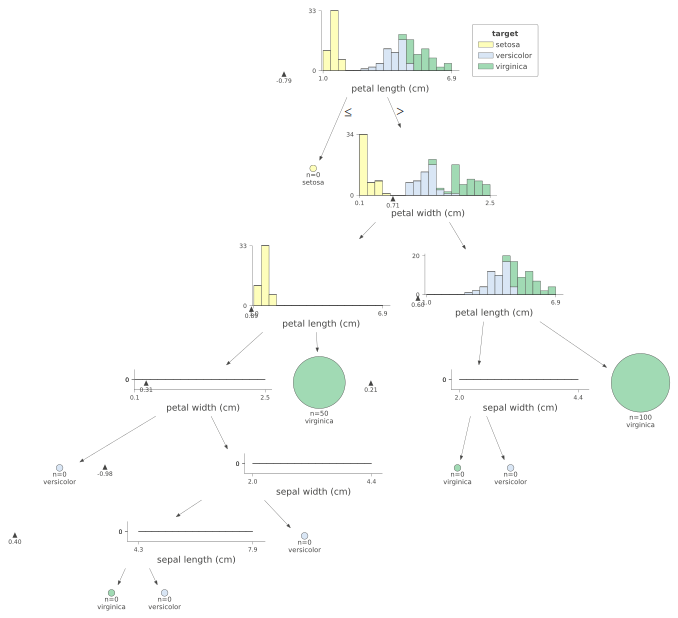

In [91]:
# there are misclassifications so let's look at the decision tree visualiziton to understand the thresholds
species_names = {'setosa', 'versicolor', 'virginica'}
dtreeviz(dtm, X, y, target_name="target", feature_names=iris.feature_names, class_names=list(iris.target_names))

In [100]:
# let's go on with the random forest model and see if we had more accurate result or not(this is an ensemble model which is pretty exciting to use:))
# I don't know the ideal estimator size so I'm gonna use a loop

from sklearn.ensemble import RandomForestClassifier

accuracy_list = []
for i in range(5, 150):
  rfm = RandomForestClassifier(n_estimators=i, random_state=42)
  rfm.fit(X_train, y_train)
  pred_i = rfm.predict(X_test)
  accuracy_list.append(metrics.accuracy_score(y_test, pred_i))

acc_df = pd.DataFrame(accuracy_list, columns=['Accuracy'])
acc_df # for this case when the size of esimator increase the accuracy decreases

,Accuracy
0,1.00
1,1.00
2,1.00
3,1.00
4,1.00
...,...
140,0.98
141,0.98
142,0.98
143,0.98


In [102]:
# fit the model and predict the output with n_estimator=5
rfm = RandomForestClassifier(n_estimators=5, random_state=42)
rfm.fit(X_train, y_train)
preds = rfm.predict(X_test)

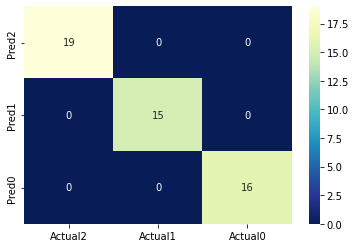

In [103]:
# visualize the predicted values and the actual values with the confusion matrix

from sklearn import metrics

con = metrics.confusion_matrix(y_test, preds)
con_df = pd.DataFrame(con, columns=['Actual2', 'Actual1', 'Actual0'], index=['Pred2', 'Pred1', 'Pred0'])
sns.heatmap(con_df, annot=True, cmap='YlGnBu_r')

Result : Even in this small dataset we got better results(more accurate) with random forest model. Also there is an information that I've just learned , you can not assign n_estimators to 0 but luckily if you try that, it doesn't cause a fatal error you just get a warning that you can easily fix.